In [1]:
!pip install kaggle

In [2]:
# Configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
# API for the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 162M/163M [00:09<00:00, 23.3MB/s]
100% 163M/163M [00:09<00:00, 18.5MB/s]


In [4]:
# Extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  sample_data


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:6])
print(with_mask_files[-3:])

['with_mask_1981.jpg', 'with_mask_2613.jpg', 'with_mask_2316.jpg', 'with_mask_916.jpg', 'with_mask_2429.jpg', 'with_mask_3150.jpg']
['with_mask_2068.jpg', 'with_mask_2227.jpg', 'with_mask_1351.jpg']


In [9]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:4])
print(without_mask_files[-3:])

['without_mask_3603.jpg', 'without_mask_519.jpg', 'without_mask_317.jpg', 'without_mask_1204.jpg']
['without_mask_1130.jpg', 'without_mask_1707.jpg', 'without_mask_2541.jpg']


In [10]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating labels for the two classes of Images

with mask -> 1

without mask -> 0

In [42]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [43]:
print(with_mask_labels[0:10])

print(without_mask_labels[0:10])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [44]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [45]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the images

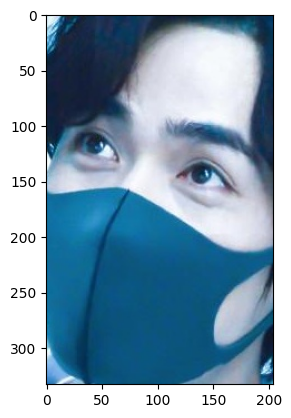

In [46]:
img = mpimg.imread('/content/data/with_mask/with_mask_1523.jpg')
imgplot = plt.imshow(img)
plt.show()

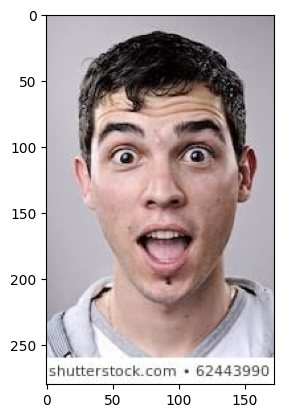

In [47]:
img = mpimg.imread('/content/data/without_mask/without_mask_2144.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

- Resizing the images

- Converting the images to numpy arrays

In [49]:
# Converting the images to numpy arrays

with_mask_path = '/content/data/with_mask/'

image_data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  image_data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  image_data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [50]:
type(image_data)

list

In [51]:
len(image_data)

7553

array([[[144, 124,  98],
        [153, 134, 110],
        [167, 150, 126],
        ...,
        [245,  61,  97],
        [245,  63,  97],
        [243,  62,  95]],

       [[125, 107,  83],
        [131, 113,  90],
        [142, 125, 102],
        ...,
        [243,  62,  97],
        [242,  63,  96],
        [241,  62,  94]],

       [[154, 137, 116],
        [156, 139, 118],
        [157, 141, 121],
        ...,
        [238,  62,  95],
        [235,  61,  93],
        [233,  61,  91]],

       ...,

       [[253, 246, 226],
        [251, 241, 222],
        [248, 235, 216],
        ...,
        [113,  32,  41],
        [120,  35,  44],
        [121,  36,  44]],

       [[251, 240, 218],
        [250, 236, 216],
        [247, 230, 209],
        ...,
        [127,  35,  46],
        [134,  39,  50],
        [137,  40,  51]],

       [[249, 234, 214],
        [248, 232, 210],
        [245, 226, 204],
        ...,
        [135,  39,  50],
        [143,  42,  54],
        [145,  43,  54]]], dtype=uint8)
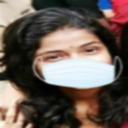

In [52]:
image_data[0]

array([[[ 94,  16,   2],
        [105,  20,   6],
        [119,  26,   4],
        ...,
        [129,  30,   1],
        [132,  29,   0],
        [140,  29,   1]],

       [[ 97,  16,   2],
        [103,  16,   2],
        [119,  22,   1],
        ...,
        [131,  30,   1],
        [137,  32,   1],
        [145,  33,   2]],

       [[102,  16,   2],
        [109,  16,   1],
        [126,  23,   0],
        ...,
        [135,  31,   1],
        [142,  33,   1],
        [154,  38,   4]],

       ...,

       [[ 51,  11,   2],
        [ 50,  10,   1],
        [ 51,  11,   1],
        ...,
        [251, 142,   3],
        [251, 142,   5],
        [250, 140,   5]],

       [[ 56,  15,   1],
        [ 56,  15,   1],
        [ 60,  18,   4],
        ...,
        [252, 138,   2],
        [252, 137,   3],
        [251, 135,   1]],

       [[ 69,  27,   4],
        [ 69,  26,   3],
        [ 72,  26,   5],
        ...,
        [250, 129,   1],
        [248, 126,   1],
        [253, 129,   4]]], dtype=uint8)
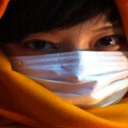

In [53]:
image_data[23]

array([[[171, 183, 203],
        [172, 183, 203],
        [176, 186, 206],
        ...,
        [186, 137, 115],
        [178, 130, 108],
        [175, 127, 105]],

       [[171, 183, 203],
        [172, 183, 203],
        [175, 185, 205],
        ...,
        [189, 140, 118],
        [181, 133, 111],
        [178, 130, 108]],

       [[171, 182, 202],
        [171, 182, 202],
        [172, 182, 203],
        ...,
        [193, 145, 123],
        [186, 138, 116],
        [183, 135, 113]],

       ...,

       [[249, 251, 247],
        [249, 251, 247],
        [251, 253, 249],
        ...,
        [255, 246, 241],
        [253, 244, 239],
        [253, 244, 239]],

       [[251, 252, 248],
        [251, 253, 248],
        [251, 252, 247],
        ...,
        [255, 247, 241],
        [254, 245, 240],
        [254, 245, 240]],

       [[252, 253, 248],
        [252, 253, 248],
        [250, 251, 246],
        ...,
        [255, 247, 241],
        [254, 245, 240],
        [254, 245, 240]]], dtype=uint8)
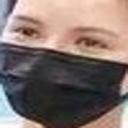

In [54]:
image_data[1440]

In [55]:
type(image_data[0])

numpy.ndarray

In [57]:
# Converting the image list and the label list to numpy arrays

X = np.array(image_data)
y = np.array(labels)

In [58]:
type(y)

numpy.ndarray

In [59]:
type(X)

numpy.ndarray

In [61]:
print(X.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [62]:
print(X)

[[[[144 124  98]
   [153 134 110]
   [167 150 126]
   ...
   [245  61  97]
   [245  63  97]
   [243  62  95]]

  [[125 107  83]
   [131 113  90]
   [142 125 102]
   ...
   [243  62  97]
   [242  63  96]
   [241  62  94]]

  [[154 137 116]
   [156 139 118]
   [157 141 121]
   ...
   [238  62  95]
   [235  61  93]
   [233  61  91]]

  ...

  [[253 246 226]
   [251 241 222]
   [248 235 216]
   ...
   [113  32  41]
   [120  35  44]
   [121  36  44]]

  [[251 240 218]
   [250 236 216]
   [247 230 209]
   ...
   [127  35  46]
   [134  39  50]
   [137  40  51]]

  [[249 234 214]
   [248 232 210]
   [245 226 204]
   ...
   [135  39  50]
   [143  42  54]
   [145  43  54]]]


 [[[  6   7   9]
   [  6   7   9]
   [  7   8  10]
   ...
   [ 41  41  33]
   [ 39  39  31]
   [ 36  37  29]]

  [[  6   7   9]
   [  6   7   9]
   [  7   8  10]
   ...
   [ 41  41  33]
   [ 40  40  32]
   [ 37  38  30]]

  [[  6   7   9]
   [  6   7   9]
   [  7   8  10]
   ...
   [ 42  42  34]
   [ 40  41  33]
   [ 38  39

In [63]:
print(y)

[1 1 1 ... 0 0 0]


Train Test Split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [65]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [66]:
print(y.shape, y_train.shape, y_test.shape)

(7553,) (6042,) (1511,)


 Scaling the data

In [67]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 70,  65,  71],
        [ 37,  32,  38],
        [ 17,  14,  21],
        ...,
        [ 38,  38,  42],
        [ 74,  73,  78],
        [123, 122, 127]],

       [[ 52,  46,  52],
        [ 27,  22,  29],
        [ 14,  11,  18],
        ...,
        [ 39,  39,  43],
        [ 75,  74,  79],
        [123, 122, 127]],

       [[ 33,  30,  37],
        [ 20,  17,  24],
        [ 16,  13,  20],
        ...,
        [ 35,  35,  38],
        [ 69,  68,  73],
        [117, 116, 121]],

       ...,

       [[203, 203, 213],
        [207, 207, 217],
        [208, 208, 218],
        ...,
        [105, 104, 121],
        [ 92,  91, 107],
        [ 76,  75,  91]],

       [[208, 208, 218],
        [201, 201, 211],
        [183, 183, 193],
        ...,
        [ 93,  92, 108],
        [ 85,  84, 100],
        [ 71,  70,  85]],

       [[198, 202, 211],
        [184, 186, 195],
        [151, 151, 161],
        ...,
        [ 63,  65,  81],
        [ 62,  64,  79],
        [ 53,  55,  70]]], dtype=uint8)
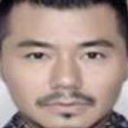

In [69]:
X_train[3]

array([[[158, 158, 158],
        [157, 157, 157],
        [161, 161, 161],
        ...,
        [120, 120, 120],
        [120, 120, 120],
        [129, 129, 129]],

       [[161, 161, 161],
        [159, 159, 159],
        [162, 162, 162],
        ...,
        [128, 128, 128],
        [126, 126, 126],
        [132, 132, 132]],

       [[166, 166, 166],
        [163, 163, 163],
        [163, 163, 163],
        ...,
        [136, 136, 136],
        [130, 130, 130],
        [133, 133, 133]],

       ...,

       [[ 34,  37,  46],
        [ 33,  36,  45],
        [ 32,  35,  44],
        ...,
        [135, 138, 145],
        [132, 135, 142],
        [138, 141, 148]],

       [[ 33,  36,  45],
        [ 32,  35,  44],
        [ 32,  35,  44],
        ...,
        [126, 129, 136],
        [140, 143, 150],
        [140, 143, 150]],

       [[ 33,  36,  45],
        [ 32,  35,  44],
        [ 31,  34,  43],
        ...,
        [ 67,  70,  77],
        [137, 141, 148],
        [139, 142, 149]]], dtype=uint8)
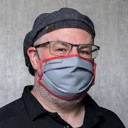

In [70]:
X_train[0]

In [71]:
X_train_scaled[0]

array([[[0.61960784, 0.61960784, 0.61960784],
        [0.61568627, 0.61568627, 0.61568627],
        [0.63137255, 0.63137255, 0.63137255],
        ...,
        [0.47058824, 0.47058824, 0.47058824],
        [0.47058824, 0.47058824, 0.47058824],
        [0.50588235, 0.50588235, 0.50588235]],

       [[0.63137255, 0.63137255, 0.63137255],
        [0.62352941, 0.62352941, 0.62352941],
        [0.63529412, 0.63529412, 0.63529412],
        ...,
        [0.50196078, 0.50196078, 0.50196078],
        [0.49411765, 0.49411765, 0.49411765],
        [0.51764706, 0.51764706, 0.51764706]],

       [[0.65098039, 0.65098039, 0.65098039],
        [0.63921569, 0.63921569, 0.63921569],
        [0.63921569, 0.63921569, 0.63921569],
        ...,
        [0.53333333, 0.53333333, 0.53333333],
        [0.50980392, 0.50980392, 0.50980392],
        [0.52156863, 0.52156863, 0.52156863]],

       ...,

       [[0.13333333, 0.14509804, 0.18039216],
        [0.12941176, 0.14117647, 0.17647059],
        [0.1254902 , 0

CNN

In [72]:
import tensorflow as tf
from tensorflow import keras

In [73]:
# Define the number of output classes (e.g., binary classification)
num_of_classes = 2

# Initialize a sequential model
model = keras.Sequential()

# Add the first convolutional layer
# Conv2D layer with 32 filters, a kernel size of 3x3, ReLU activation function,
# and an input shape of 128x128x3 (for images of size 128x128 with 3 color channels)
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))

# Add a max pooling layer to reduce the spatial dimensions of the feature maps
# Pooling size is 2x2, so it reduces each feature map by half
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# Add the second convolutional layer
# Conv2D layer with 64 filters, a kernel size of 3x3, and ReLU activation function
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

# Add another max pooling layer to further reduce the spatial dimensions
# Pooling size is 2x2
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# Flatten the output from the previous layer (converts the 2D matrix to a 1D vector)
# This is necessary before feeding the data into fully connected (dense) layers
model.add(keras.layers.Flatten())

# Add the first fully connected (dense) layer
# Dense layer with 128 units and ReLU activation function
model.add(keras.layers.Dense(128, activation='relu'))

# Add a dropout layer to prevent overfitting
# 50% of the neurons are randomly set to zero during each update
model.add(keras.layers.Dropout(0.5))

# Add the second fully connected (dense) layer
# Dense layer with 64 units and ReLU activation function
model.add(keras.layers.Dense(64, activation='relu'))

# Add another dropout layer to prevent overfitting
# 50% of the neurons are randomly set to zero during each update
model.add(keras.layers.Dropout(0.5))

# Add the output layer
# Dense layer with a number of units equal to the number of classes
# Sigmoid activation function is used for binary classification (since num_of_classes is 2)
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
# Compiling the NN
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

Training the NN

In [75]:
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - acc: 0.6698 - loss: 0.7320 - val_acc: 0.8876 - val_loss: 0.3207
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.8717 - loss: 0.3233 - val_acc: 0.9025 - val_loss: 0.2462
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.8968 - loss: 0.2705 - val_acc: 0.9240 - val_loss: 0.2006
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9143 - loss: 0.2288 - val_acc: 0.9322 - val_loss: 0.1975
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9265 - loss: 0.1854 - val_acc: 0.9273 - val_loss: 0.2297


Model Evaluation

In [77]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Accuracy:', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.8973 - loss: 0.2550
Test Accuracy: 0.9046988487243652


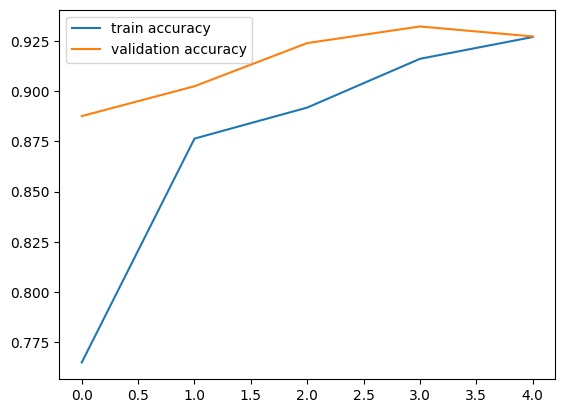

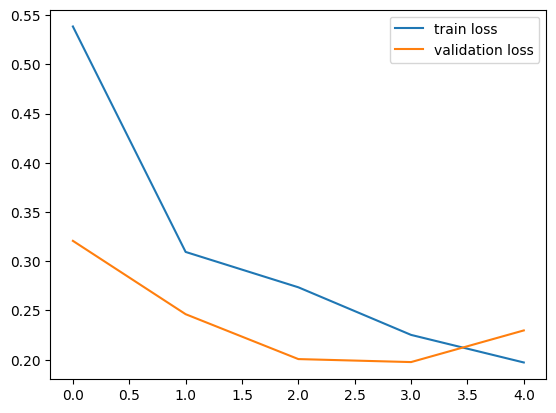

In [79]:
h = history

# The accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

# The loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted: /content/depositphotos_62143509-stock-photo-person-wearing-protective-mask-in.jpg


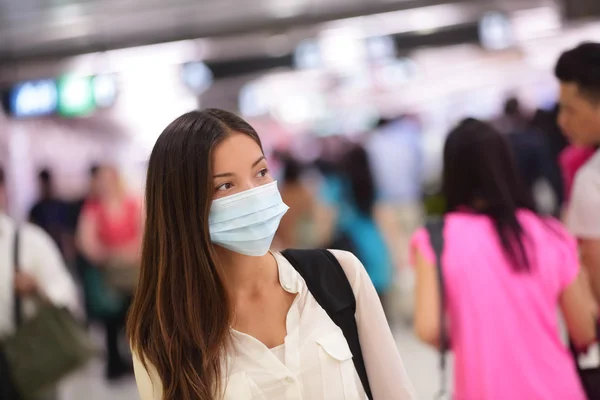

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[0.13263686 0.736299  ]]
1
The person in the image is wearing a mask


In [81]:
# Prompt the user to enter the path of the image to be predicted
input_image_path = input('Path of the image to be predicted: ')

# Read the image from the specified path using OpenCV
input_image = cv2.imread(input_image_path)

# Display the input image to the user
cv2_imshow(input_image)

# Resize the image to 128x128 pixels to match the input shape expected by the model
input_image_resized = cv2.resize(input_image, (128,128))

# Scale the pixel values to the range [0, 1] by dividing by 255
# This is done to normalize the input image
input_image_scaled = input_image_resized / 255

# Reshape the image to add an extra dimension, converting it to the format [1, 128, 128, 3]
# The model expects the input in batches, so this extra dimension represents the batch size (here, it's 1)
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

# Use the trained model to predict the class of the input image
input_prediction = model.predict(input_image_reshaped)

# Print the raw prediction output (probabilities for each class)
print(input_prediction)

# Get the index of the class with the highest probability (0 or 1 in this case)
input_pred_label = np.argmax(input_prediction)

# Print the predicted class label (0 or 1)
print(input_pred_label)

# Check if the predicted label corresponds to '1' (wearing a mask)
if input_pred_label == 1:
    # If the label is 1, print that the person is wearing a mask
    print('The person in the image is wearing a mask')
else:
    # If the label is not 1 (i.e., it's 0), print that the person is not wearing a mask
    print('The person in the image is not wearing a mask')


Path of the image to be predicted: /content/woman-2542252_1280.jpg


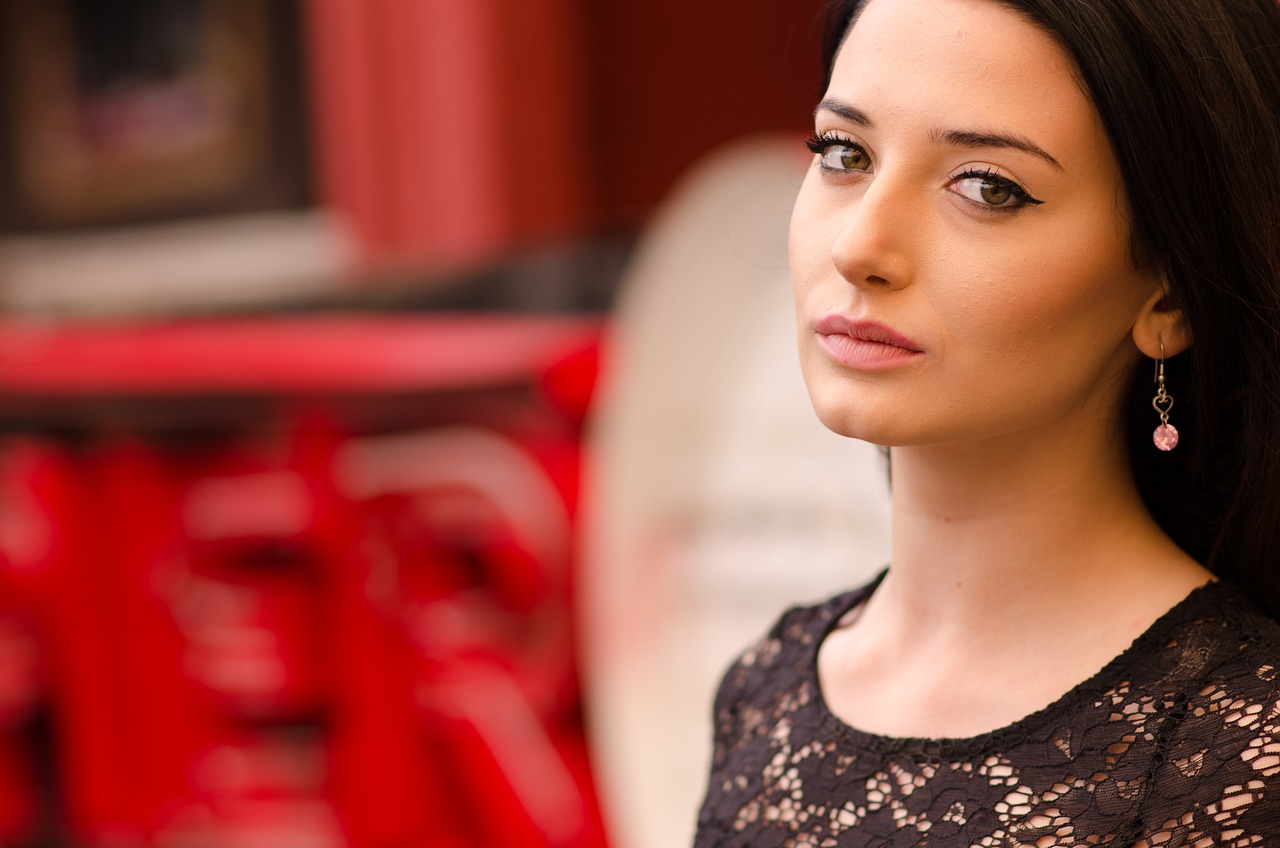

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[0.09230658 0.720536  ]]
Accuracy: 0.720536
The person in the image is not wearing a mask


In [86]:
# Prompt the user to enter the path of the image to be predicted
input_image_path = input('Path of the image to be predicted: ')

# Read the image from the specified path using OpenCV
input_image = cv2.imread(input_image_path)

# Display the input image to the user
cv2_imshow(input_image)

# Resize the image to 128x128 pixels to match the input shape expected by the model
input_image_resized = cv2.resize(input_image, (128,128))

# Scale the pixel values to the range [0, 1] by dividing by 255
# This is done to normalize the input image
input_image_scaled = input_image_resized / 255

# Reshape the image to add an extra dimension, converting it to the format [1, 128, 128, 3]
# The model expects the input in batches, so this extra dimension represents the batch size (here, it's 1)
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

# Use the trained model to predict the class of the input image
input_prediction = model.predict(input_image_reshaped)

# Print the raw prediction output (probabilities for each class)
print(input_prediction)

# Extract the predicted accuracy for the second class (index 1)
# In binary classification, this typically corresponds to the class with label 1
accuracy = input_prediction[0][1]

# Print the accuracy of the prediction
print("Accuracy:", accuracy)

# Check if the accuracy for the second class is above 0.50
# If it is, the model predicts that the person is not wearing a mask
if accuracy > 0.50:
    print('The person in the image is not wearing a mask')
else:
    # If the accuracy is 0.50 or less, the model predicts that the person is wearing a mask
    print('The person in the image is wearing a mask')
